**Лабораторная работа №2. Алгоритмы классификации.** Задача 2: определение мошенничества с кредитными картами

Датасет представляет собой набор данных о транзакциях кредитных карт, который часто используется для задач обнаружения мошенничества.

Признаки (Features):

Time: количество секунд, прошедших между данной транзакцией и первой транзакцией в датасете. Этот признак может быть полезен для анализа временных паттернов в данных.

V1-V28: эти признаки представляют собой результат обработки данных с использованием метода PCA (Principal Component Analysis) для уменьшения размерности. Они являются анонимизированными и не содержат прямой информации о транзакциях, но могут содержать важные паттерны, полезные для обнаружения мошенничества.

Amount: сумма транзакции. Этот признак может быть важен, так как мошеннические транзакции часто имеют необычные суммы.

Class: целевой признак, который указывает, является ли транзакция мошеннической (1) или нет (0). Это бинарная классификация.

Цель классификации:

Основная цель заключается в разработке модели, которая может предсказывать, является ли транзакция мошеннической, основываясь на предоставленных признаках. Это задача бинарной классификации, где модель должна минимизировать количество ложных срабатываний (False Positives) и ложных пропусков (False Negatives), так как оба типа ошибок могут иметь значительные последствия.

Шаг 1: загрузка датасета

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Загрузка данных из файла
df = pd.read_csv('creditcard.csv')

Шаг 2: предварительная обработка данных

StandardScaler — это метод стандартизации, который преобразует данные таким образом, чтобы они имели среднее значение 0 и стандартное отклонение 1. Это достигается путем вычитания среднего значения признака и деления на стандартное отклонение.

In [2]:
# Масштабирование всех признаков, кроме 'Time' и 'Class'
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['Amount'] + [f'V{i}' for i in range(1, 29)]] = scaler.fit_transform(df[['Amount'] + [f'V{i}' for i in range(1, 29)]])

# Удаление строк с NaN значениями, если они есть
df = df.dropna()


Шаг 3: разделение выборки на тестовую и обучающую. Предобработка выборки с помощью SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) — это метод увеличения выборки, предназначенный для обработки несбалансированных наборов данных.

Для каждого примера из меньшего класса находятся его k ближайших соседей (обычно с использованием метрики Евклидова расстояния).

Затем случайным образом выбирается один из этих соседей, и между ним и исходным примером создается синтетический пример.

Этот процесс повторяется до тех пор, пока не будет достигнуто желаемое количество синтетических примеров.

In [3]:
# Разделение данных на признаки и целевую переменную
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

# Применение SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Шаг 4: выбор классификаторов и обучение моделей

Логистическая регрессия — это статистический метод, используемый для бинарной классификации, то есть для задач, где целевая переменная принимает одно из двух возможных значений (например, 0 или 1). Она моделирует вероятность принадлежности к одному из классов с использованием логистической функции.

Основные аспекты логистической регрессии:

Логистическая функция (сигмоида): преобразует линейную комбинацию признаков в вероятность, которая находится в диапазоне от 0 до 1.

Коэффициенты: логистическая регрессия оценивает коэффициенты, которые указывают на влияние каждого признака на вероятность принадлежности к классу.

Интерпретируемость: логистическая регрессия легко интерпретируется, так как коэффициенты показывают, как изменение признака влияет на вероятность принадлежности к классу.

Точность (Accuracy):

Доля правильно предсказанных результатов от общего числа предсказаний.

Точность = (TP + TN)/(TP + TN + FP + FN)

TP (True Positive) — истинно положительные результаты (модель правильно предсказала положительный класс).

TN (True Negative) — истинно отрицательные результаты (модель правильно предсказала отрицательный класс).

Полнота (Recall):

Доля истинно положительных результатов от общего числа фактически положительных случаев.

Полнота = TP / (TP + FN)

FN (False Negative) — ложноотрицательные результаты (модель неправильно предсказала отрицательный класс).

ROC AUC:

ROC-кривая (Receiver Operating Characteristic curve): График, показывающий зависимость между долей истинных положительных результатов
(TPR) и долей ложных положительных результатов (FPR) при различных порогах вероятности.

AUC (Area Under the Curve): Площадь под ROC-кривой. Чем ближе AUC к 1, тем лучше модель различает классы.
Истинные и ложные срабатывания:

TPR (True Positive Rate): Доля истинно положительных результатов.

FPR (False Positive Rate): Доля ложноположительных результатов (модель неправильно предсказала положительный класс).



Логистическая регрессия - Точность: 0.9600091447865924, Полнота: 0.9310235888795282, ROC AUC: 0.9856604805856889


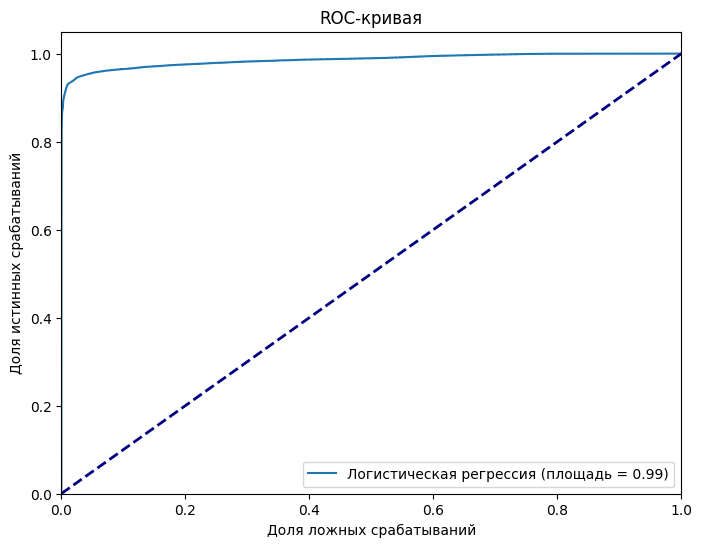

In [4]:
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Логистическая регрессия - Точность: {accuracy}, Полнота: {recall}, ROC AUC: {roc_auc}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Логистическая регрессия (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля истинных срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


Метод опорных векторов (SVM) — это мощный алгоритм машинного обучения, используемый для задач классификации и регрессии. Основная идея SVM заключается в нахождении гиперплоскости, которая максимально разделяет классы в пространстве признаков.

Основные аспекты SVM:

Гиперплоскость: в случае линейно разделимых данных SVM находит гиперплоскость, которая максимально увеличивает отступ (маржу) между классами.

Опорные векторы: это точки данных, которые находятся ближе всего к гиперплоскости и определяют её положение и ориентацию. Они являются критически важными для классификации, так как изменение их положения изменяет гиперплоскость.

Ядра: SVM может использовать различные ядра для работы с нелинейно разделимыми данными. Ядра преобразуют данные в более высокое измерение, где они становятся линейно разделимыми.

Метод опорных векторов (SVM) - Точность: 0.9609763818300124, Полнота: 0.9343056725638865, ROC AUC: 0.9863639654442955


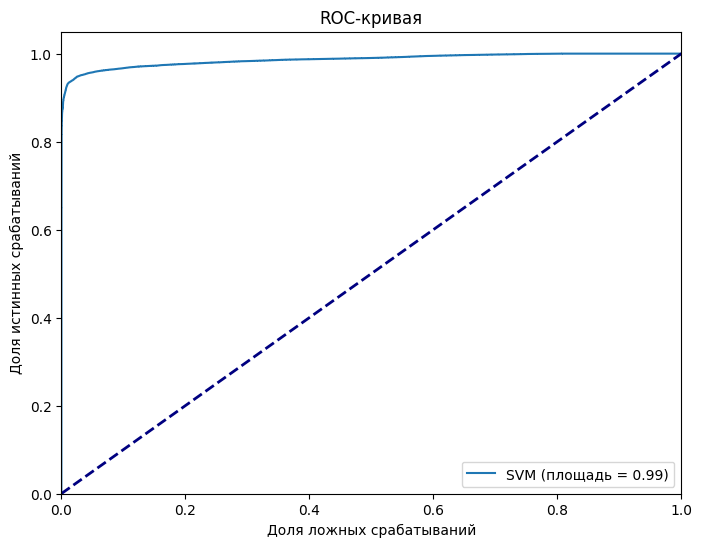

In [5]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Уменьшение размера данных для тестирования
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)

# Метод опорных векторов (SVM) с линейным ядром и калибровкой
base_model = LinearSVC(max_iter=1000)
model = CalibratedClassifierCV(base_model)
model.fit(X_train_small, y_train_small)

# Предсказания и оценка
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Метод опорных векторов (SVM) - Точность: {accuracy}, Полнота: {recall}, ROC AUC: {roc_auc}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля истинных срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


Случайный лес — это ансамблевый метод, который строит множество деревьев решений и усредняет их предсказания для улучшения точности и устойчивости модели.

Основные идеи:

Бэггинг: Каждое дерево обучается на случайной подвыборке данных с возвращением (бутстреп-выборка).

Случайный выбор признаков: На каждом узле дерева случайным образом выбирается подмножество признаков для расщепления.

Усреднение: Для классификации используется голосование большинства, для регрессии — усреднение предсказаний.

Случайный лес - Точность: 0.9596310430332554, Полнота: 0.9256178039876439, ROC AUC: 0.9902390242061887


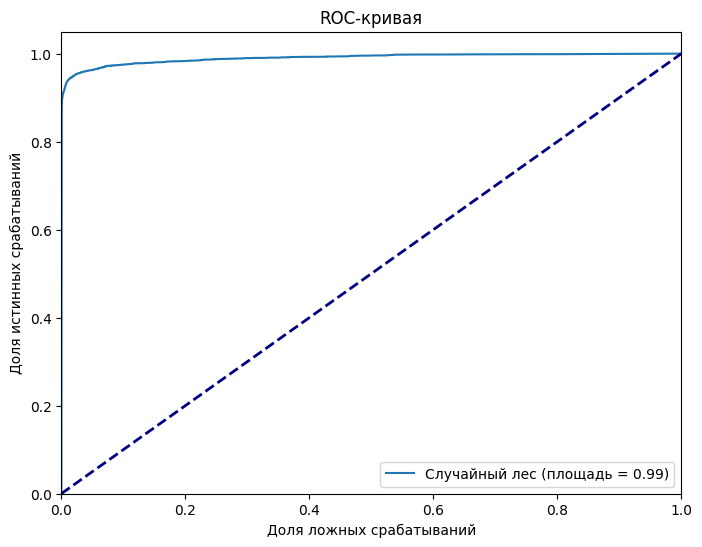

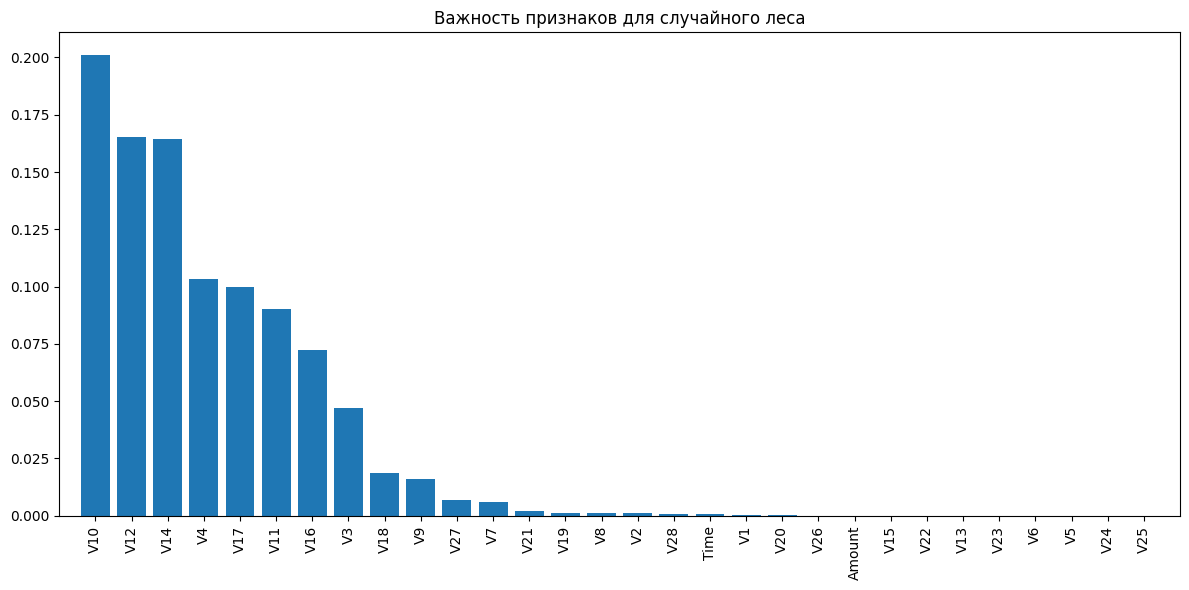

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Случайный лес
model = RandomForestClassifier(n_estimators=30, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Случайный лес - Точность: {accuracy}, Полнота: {recall}, ROC AUC: {roc_auc}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Случайный лес (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля истинных срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

importances_rf = model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Построение графика
plt.figure(figsize=(12, 6))
plt.title("Важность признаков для случайного леса")
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_rf], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

Градиентный бустинг — это ансамблевый метод, который строит модель последовательно, добавляя новые слабые модели (обычно деревья решений) для исправления ошибок предыдущих моделей.

Основные идеи:

Последовательное обучение: каждая новая модель обучается на ошибках предыдущей модели. Это позволяет постепенно улучшать производительность ансамбля.

Градиентный спуск: используется для минимизации функции потерь. Каждая новая модель строится в направлении антиградиента функции потерь.

Регуляризация: используется для предотвращения переобучения, например, через ограничение глубины деревьев или использование методов уменьшения шага (learning rate).

Градиентный бустинг - Точность: 0.9720908147653131, Полнота: 0.9562973883740522, ROC AUC: 0.9966282561820605


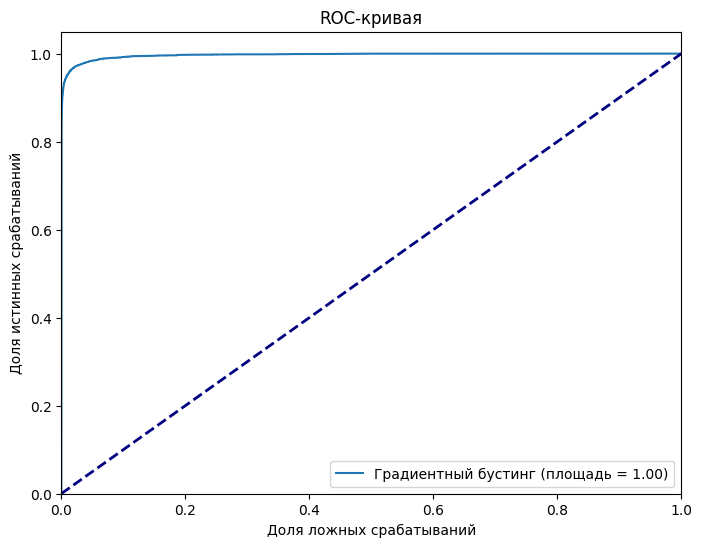

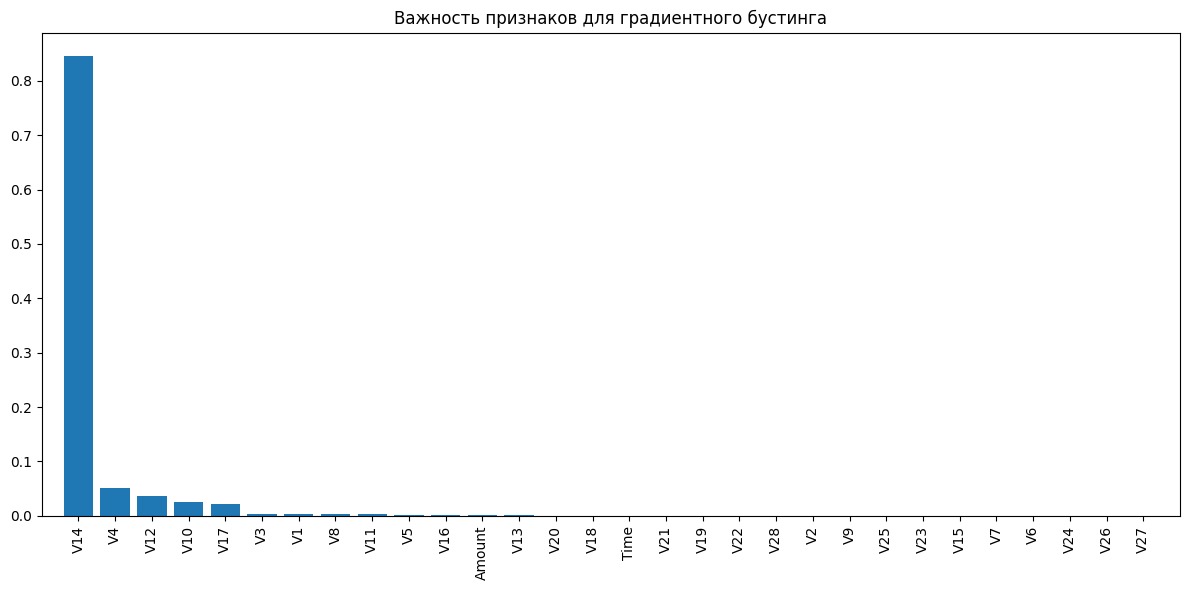

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Градиентный бустинг
model = GradientBoostingClassifier(n_estimators=30, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Градиентный бустинг - Точность: {accuracy}, Полнота: {recall}, ROC AUC: {roc_auc}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Градиентный бустинг (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля истинных срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# Важность признаков
importances_gb = model.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

# Построение графика
plt.figure(figsize=(12, 6))
plt.title("Важность признаков для градиентного бустинга")
plt.bar(range(X.shape[1]), importances_gb[indices_gb], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_gb], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


MLPClassifier — это реализация многослойного перцептрона (Multi-Layer Perceptron) в библиотеке scikit-learn, предназначенная для задач классификации. Многослойный перцептрон является типом искусственной нейронной сети, который состоит из нескольких слоев нейронов.

Основные компоненты MLPClassifier:

Слои нейронов:

Входной слой: принимает признаки из данных.

Скрытые слои: один или несколько слоев, которые обрабатывают информацию, поступающую с входного слоя. Каждый нейрон в скрытом слое принимает взвешенную сумму входов, пропускает её через активационную функцию и передает результат на следующий слой.

Выходной слой: производит окончательное предсказание класса.

Нейронная сеть - Точность: 0.9124210822503209, Полнота: 0.8264356922212861, ROC AUC: 0.9576913466617677


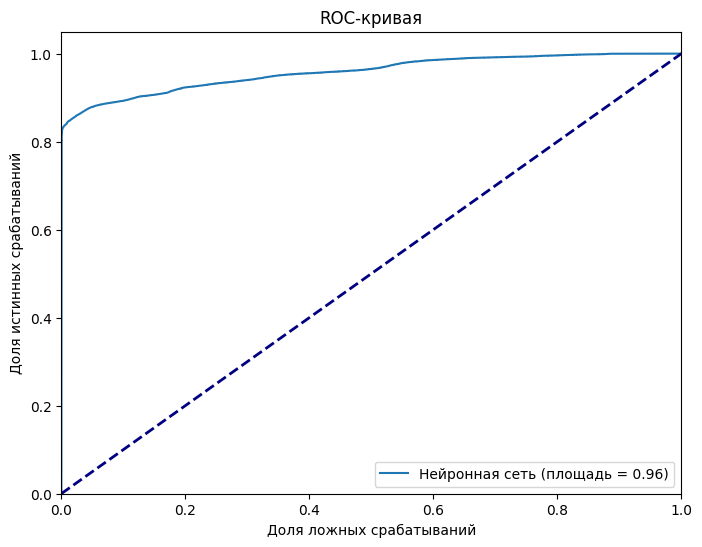

In [8]:
from sklearn.neural_network import MLPClassifier

# Нейронная сеть с увеличенным количеством итераций и измененным солвером
model = MLPClassifier(max_iter=100, hidden_layer_sizes=(20,), solver='adam', alpha=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Нейронная сеть - Точность: {accuracy}, Полнота: {recall}, ROC AUC: {roc_auc}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Нейронная сеть (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложных срабатываний')
plt.ylabel('Доля истинных срабатываний')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


Шаг 5. Подбор гиперпараметров для моделей

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Параметры для логистической регрессии
param_grid_lr = {
    'регуляризация': [0.01, 0.1, 1, 10],  # C: обратная сила регуляризации
    'солвер': ['liblinear', 'saga']       # алгоритм оптимизации
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=2000), param_grid_lr, cv=3, scoring='accuracy')
grid_search_lr.fit(X_train_small, y_train_small)

print(f"Лучшие параметры для логистической регрессии: {grid_search_lr.best_params_}")
print(f"Лучшая точность: {grid_search_lr.best_score_}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Лучшие параметры для логистической регрессии: {'C': 0.01, 'solver': 'liblinear'}
Лучшая точность: 0.9605627434962987


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Параметры для случайного леса
param_grid_rf = {
    'число_деревьев': [30, 50, 100],  # n_estimators: количество деревьев
    'макс_глубина': [5, 10, 15]        # max_depth: максимальная глубина дерева
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_small, y_train_small)

print(f"Лучшие параметры для случайного леса: {grid_search_rf.best_params_}")
print(f"Лучшая точность: {grid_search_rf.best_score_}")


Лучшие параметры для случайного леса: {'max_depth': 10, 'n_estimators': 10}
Лучшая точность: 0.9869421676475268


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Параметры для градиентного бустинга
param_grid_gb = {
    'число_деревьев': [30, 50, 100],  # n_estimators: количество деревьев
    'темп_обучения': [0.01, 0.1, 0.2], # learning_rate: темп обучения
    'макс_глубина': [3, 5, 7]          # max_depth: максимальная глубина дерева
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(X_train_small, y_train_small)

print(f"Лучшие параметры для градиентного бустинга: {grid_search_gb.best_params_}")
print(f"Лучшая точность: {grid_search_gb.best_score_}")


Лучшие параметры для градиентного бустинга: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Лучшая точность: 0.9862386834746651


In [12]:
from sklearn.neural_network import MLPClassifier

# Параметры для нейронной сети
param_grid_nn = {
    'размер_слоев': [(20,), (50,), (20, 20)],  # hidden_layer_sizes: количество нейронов в скрытых слоях
    'регуляризация': [0.0001, 0.001, 0.01],    # alpha: параметр регуляризации
    'солвер': ['adam', 'sgd']                  # алгоритм оптимизации
}

grid_search_nn = GridSearchCV(MLPClassifier(max_iter=200), param_grid_nn, cv=3, scoring='accuracy')
grid_search_nn.fit(X_train_small, y_train_small)

print(f"Лучшие параметры для нейронной сети: {grid_search_nn.best_params_}")
print(f"Лучшая точность: {grid_search_nn.best_score_}")


Лучшие параметры для нейронной сети: {'alpha': 0.001, 'hidden_layer_sizes': (30,), 'solver': 'adam'}
Лучшая точность: 0.8988315100458527
